In [13]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5655236658032169577
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 2850451184031832215
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 9419844874053764200
physical_device_desc: "device: XLA_GPU device"
]


In [14]:
import os  # Operating system interfaces
import tensorflow as tf
from tensorflow import keras    # TensorFlow deep learning framework
from tensorflow.keras import layers, regularizers
import matplotlib.pyplot as plt                            # Plotting library
import matplotlib.image as mpimg                           # Image loading and manipulation library
from tensorflow.keras.models import Sequential, Model      # Sequential and Functional API for building models
from tensorflow.keras.optimizers import Adam               # Adam optimizer for model training
from tensorflow.keras.callbacks import EarlyStopping       # Early stopping callback for model training
from tensorflow.keras.regularizers import l1, l2           # L1 and L2 regularization for model regularization
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data augmentation and preprocessing for images
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, BatchNormalization
# Various types of layers for building neural networks
from tensorflow.keras.applications import DenseNet121, EfficientNetB4, Xception, VGG16, VGG19 # Pre-trained models for transfer learning
from tensorflow.keras.preprocessing import image_dataset_from_directory


In [15]:
# Define the path to the dataset
directory = './Downloads/train_black_aug_new'

# Load the dataset
train_ds = image_dataset_from_directory(
    directory=directory,
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(224, 224)  # Ensure this matches your model's input size
)


Found 22000 files belonging to 10 classes.


In [16]:
# Define the path to the dataset
directory_val = './Downloads/val_black_aug_new'

# Load the dataset
val_ds = image_dataset_from_directory(
    directory=directory_val,
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(224, 224)  # Ensure this matches your model's input size
)

Found 4500 files belonging to 10 classes.


In [17]:
conv_base = DenseNet121(
    weights='imagenet',
    include_top = False,
    input_shape=(224,224,3),
    pooling='avg'
)

In [18]:
conv_base.trainable = False

In [19]:
# Summary of the pretrained model
conv_base.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [20]:
model = Sequential()
model.add(conv_base)

model.add(BatchNormalization())
model.add(Dense(512, activation='relu' , kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.35))

model.add(BatchNormalization())
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.35))

model.add(BatchNormalization())
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(10, activation='softmax'))

model.build(input_shape=(None, 224, 224, 3))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 1024)              7037504   
_________________________________________________________________
batch_normalization_3 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_4 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)              

In [22]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
# history = model.fit(train_ds,epochs=10,validation_data=validation_ds)
history = model.fit(train_ds, epochs=100, validation_data=val_ds)

Epoch 1/100
688/688 [==============================] - 1152s 2s/step - loss: 4.3987 - accuracy: 0.6397 - val_loss: 1.7891 - val_accuracy: 0.7371
Epoch 2/100
688/688 [==============================] - 1146s 2s/step - loss: 1.6474 - accuracy: 0.7052 - val_loss: 1.4947 - val_accuracy: 0.7393
Epoch 3/100
688/688 [==============================] - 1159s 2s/step - loss: 1.5788 - accuracy: 0.7080 - val_loss: 1.4929 - val_accuracy: 0.7353
Epoch 4/100
688/688 [==============================] - 1144s 2s/step - loss: 1.5783 - accuracy: 0.7075 - val_loss: 1.4736 - val_accuracy: 0.7429
Epoch 5/100
688/688 [==============================] - 1167s 2s/step - loss: 1.5604 - accuracy: 0.7156 - val_loss: 1.4978 - val_accuracy: 0.7416
Epoch 6/100
688/688 [==============================] - 1172s 2s/step - loss: 1.5664 - accuracy: 0.7149 - val_loss: 1.5312 - val_accuracy: 0.7389
Epoch 7/100
688/688 [==============================] - 1160s 2s/step - loss: 1.5406 - accuracy: 0.7226 - val_loss: 1.4507 - val_ac

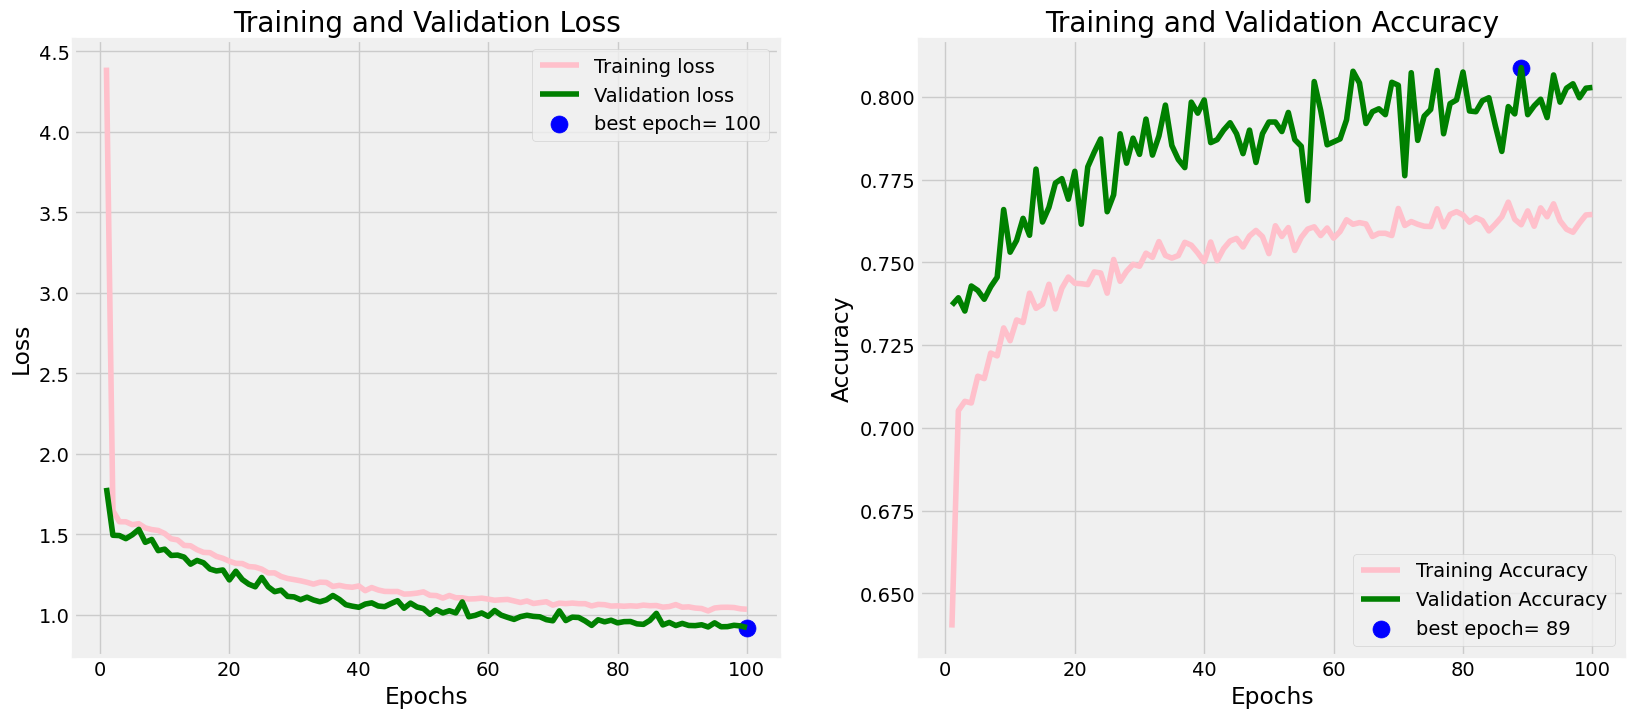

In [24]:
# Define needed variables
import numpy as np
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'pink', label= 'Training loss')
plt.plot(Epochs, val_loss, 'green', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'pink', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'green', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()